In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import imageio

# roman = imageio.imread("roman-bw.jpg")
roman = imageio.imread("mit-gray.png")
print(roman.shape)
print(roman)
roman = 255 - roman
roman_flat = roman.reshape((roman.shape[0] * roman.shape[1],))
roman_flat = roman_flat / np.sum(roman_flat)
print(roman_flat.shape)
print(roman_flat)

(1034, 2000)
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
(2068000,)
[9.30997955e-07 9.30997955e-07 9.30997955e-07 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [3]:
# position the roman picture such that its lower right is (0.01, -0.01) and its flipped
# and each pixel is length 0.01
SCALE = 0.001
X = roman.shape[1]
Y = roman.shape[0]
roman_pos = np.array([[SCALE * (-X/2 + b + Y/2 * 1j - a * 1j) for b in range(roman.shape[1])] for a in range(roman.shape[0])])
roman_pos = roman_pos.reshape((roman_flat.shape[0],))
print(roman_pos)

def sample_from_roman(size=None):
    return np.random.choice(a=roman_pos, size=size, p=roman_flat)

print("Samples:", sample_from_roman((5, 5)))

[-1.   +0.517j -0.999+0.517j -0.998+0.517j ...  0.997-0.516j  0.998-0.516j
  0.999-0.516j]
Samples: [[ 0.672+0.351j  0.235-0.208j -0.082+0.12j   0.462-0.281j -0.912+0.307j]
 [-0.173+0.07j   0.469+0.169j  0.463-0.431j  0.922+0.343j -0.236+0.112j]
 [ 0.251-0.403j  0.069-0.314j  0.644+0.185j  0.074-0.463j -0.938+0.279j]
 [-0.168+0.299j  0.155+0.183j -0.628+0.513j  0.526-0.434j  0.613+0.099j]
 [-0.123-0.347j -0.847-0.189j -0.159+0.062j  0.579+0.472j -0.964-0.113j]]


In [19]:
def perturb_and_plot_roots(base_poly, num_samples=100, stdev=1, hist2dbins=512):
    # perturb = np.random.normal(
    #     size=(num_samples, base_poly.shape[0], 2),
    #     scale=stdev
    # ).view(np.complex128)[:, :, 0]
    perturb = sample_from_roman((num_samples, base_poly.shape[0]))
    perturb[:, 0] = 0
    
    polys = base_poly + perturb
    
    roots = np.zeros((num_samples, base_poly.shape[0] - 1), dtype=np.complex128)
    for i in range(num_samples):
        roots[i] = np.roots(polys[i])
        
    plt.figure(figsize=(12,4))
    
    plt.subplot(1, 2, 1)
    root_radii = np.absolute(roots.flatten())
    plt.hist(
        root_radii,
        bins=256,
        range=(0, 2),
        density=True,
    )
    plt.xticks([0, 1, 2], size = 15)
    plt.yticks([])
    
    plt.subplot(1, 2, 2)
    root_radii = np.log(np.absolute(roots.flatten()))
    plt.hist(
        root_radii,
        bins=256,
        range=(-3, 3),
        density=True,
    )
    plt.xticks([-3, 0, 3], size = 15)
    plt.yticks([])
    
    plt.savefig(f"img/mag-and-log-{base_poly.shape[0] - 1}.png", dpi=300, transparent=True)

CPU times: user 3.84 s, sys: 32.9 ms, total: 3.87 s
Wall time: 3.37 s


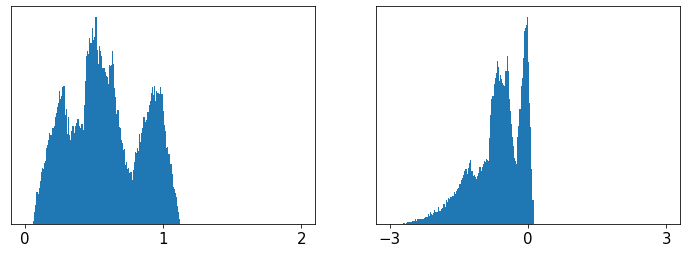

In [20]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 1 * [0], dtype=np.complex128),
    num_samples=50000,
    hist2dbins=100,
)

CPU times: user 2.34 s, sys: 11.2 ms, total: 2.35 s
Wall time: 1.87 s


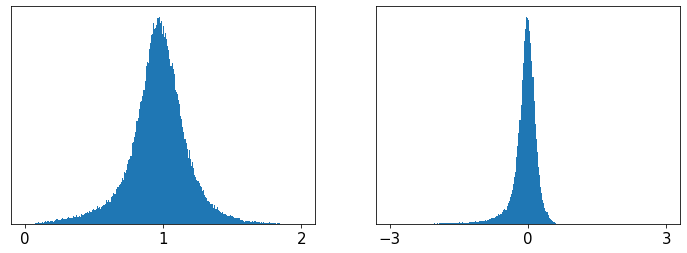

In [21]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 10 * [0], dtype=np.complex128),
    num_samples=10000,
    hist2dbins=100,
)

CPU times: user 3min, sys: 1.87 s, total: 3min 2s
Wall time: 49.5 s


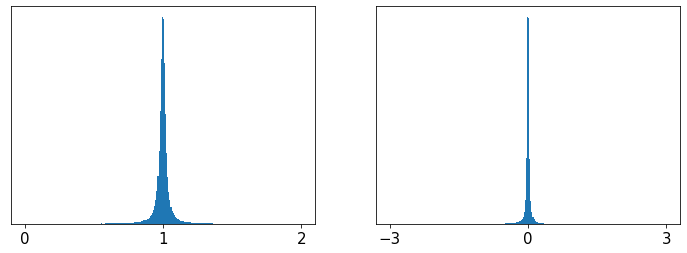

In [22]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 100 * [0], dtype=np.complex128),
    num_samples=5000,
    hist2dbins=100,
)